In [2]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.f_on_f import FunctionOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plotting.plot_fun import subplot_results, subplot_b_spline_results

### Settings

In [3]:
N = 4 # runs
Kx_family = 'step'
Kx = [[4]]
Kb = [[2]] # Polynomial
Ky = 2
epochs = 100
refinement_epochs = 100
lvls = [-1, 1]
Sigma_decay = 0
f_on_f_model = FunctionOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay)

### J matrix

In [4]:
f_on_f_model.get_Jcb()

array([[1.     , 0.     , 0.     ],
       [0.     , 0.25   , 0.03125],
       [0.     , 0.25   , 0.09375],
       [0.     , 0.25   , 0.15625],
       [0.     , 0.25   , 0.21875]])

### Sigma matrix

In [5]:
f_on_f_model.get_Sigma()

array([[1., 0.],
       [0., 1.]])

### Optimize design

In [6]:
optimizer_f_on_f = CordexDiscrete(model=f_on_f_model, runs=N, levels=lvls)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 833.01it/s]


Best objective value (A): 17.5


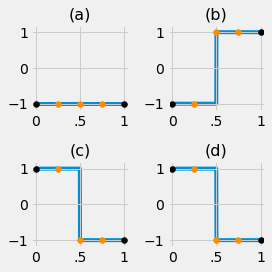

In [7]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_f_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')

## B-spline for X

### Extra Settings needed for B-spline

In [13]:
k_degree = 3
Kx_family = 'b-spline'

In [14]:
f_on_f_model = FunctionOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay, k_degree=k_degree)
f_on_f_model.get_Jcb()

array([[1.  , 0.  , 0.  ],
       [0.  , 0.25, 0.05],
       [0.  , 0.25, 0.1 ],
       [0.  , 0.25, 0.15],
       [0.  , 0.25, 0.2 ]])

In [15]:
optimizer_f_on_f = CordexDiscrete(model=f_on_f_model, runs=N, levels=lvls)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 805.71it/s]


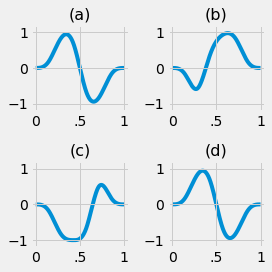

Best objective value (A): 24.82


<Figure size 432x288 with 0 Axes>

In [16]:
subplot_b_spline_results(2, 2, np.linspace(0,1,1000), best_design_f_on_f, k_degree)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')